<a href="https://colab.research.google.com/github/Bharathrajkura/Stock_Price_prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics

importing dataset

In [ ]:
df=pd.read_csv('/content/Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df.shape

(1692, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


EDA(Exploratory Data Analysis)

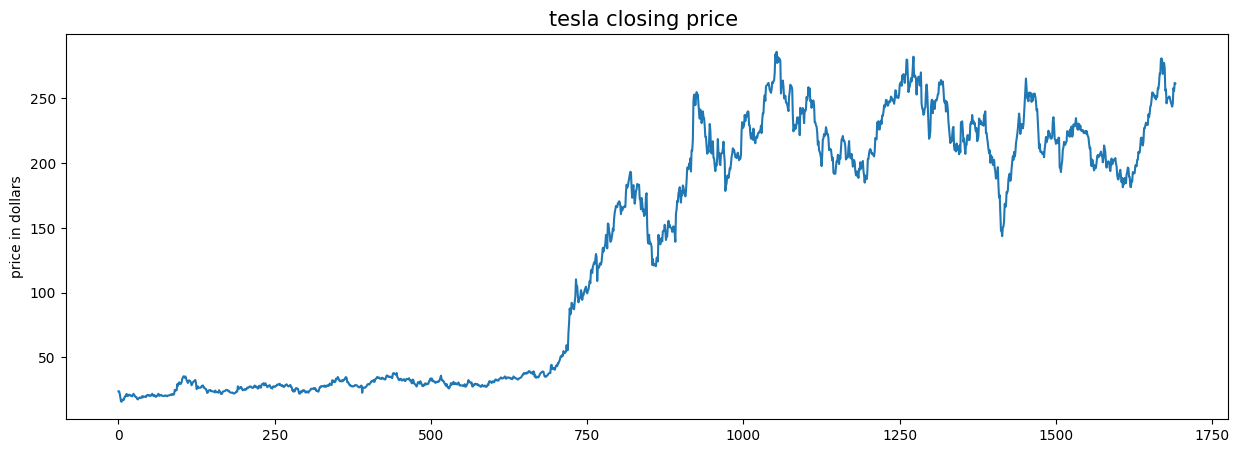

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('tesla closing price ',fontsize=15)
plt.ylabel('price in dollars')
plt.show()

In [ ]:
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
#droping adjacent close as it is redundant as it is same as close
df=df.drop(['Adj Close'],axis=1)

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


the above implies there is no redundant data so we can proceed to next step

In [ ]:
splitted=df['Date'].str.split('/',expand=True)
df['day']=splitted[1].astype('int')
df['month']=splitted[0].astype('int')
df['year']=splitted[2].astype('int')
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [ ]:
df['is_quater_end']=np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quater_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [18]:
df.drop(['Date'],axis=1).groupby('is_quater_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quater_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


In [19]:
df['open-close']=df['Open']-df['Close']
df['low-high']=df['Low']-df['High']
df['target']=np.where(df['Close'].shift(-1)>df['Close'],1,0)

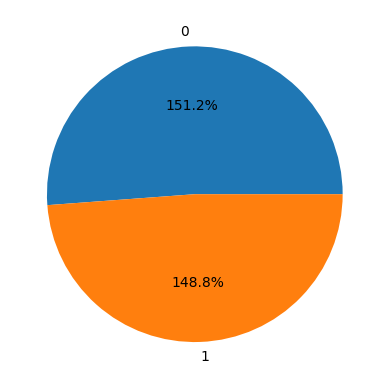

In [20]:
plt.pie(df['target'].value_counts().values,labels=[0,1],autopct='1%.1f%%')
plt.show()

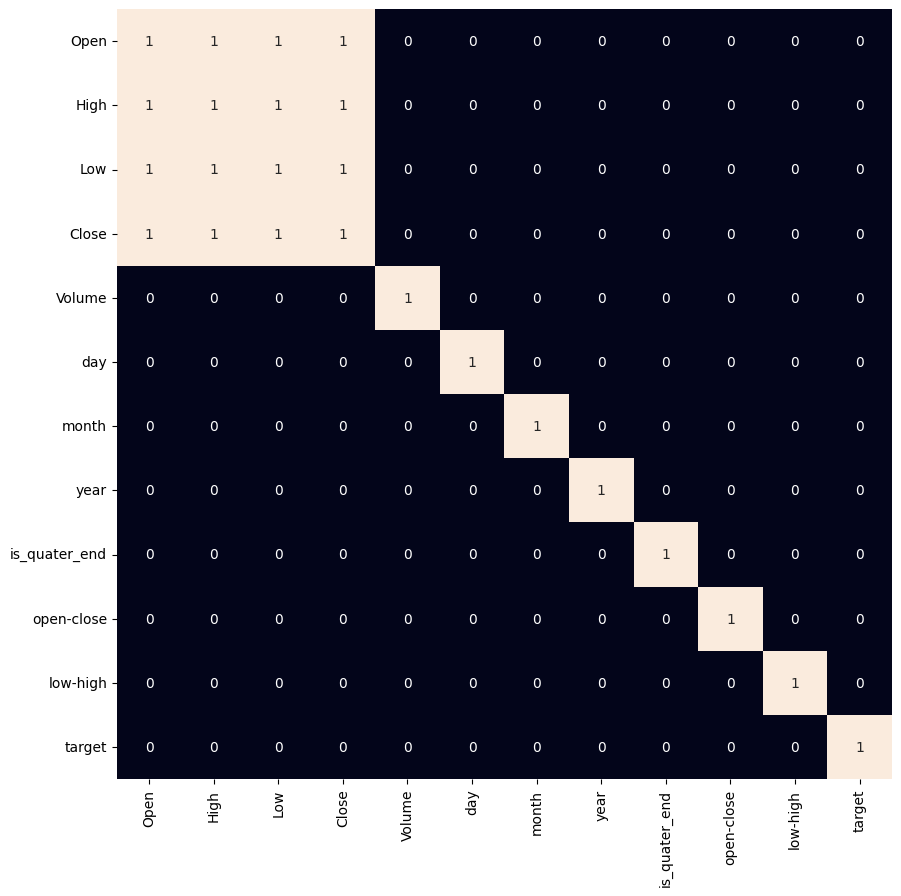

In [22]:
plt.figure(figsize=(10,10))
sb.heatmap(df.drop('Date',axis=1).corr()>0.9,annot=True,cbar=False)
plt.show()

data splitting and Normalization

In [24]:
features=df[['open-close','low-high','is_quater_end']]
target=df['target']
scaler=StandardScaler()
features=scaler.fit_transform(features)

In [25]:
X_train,X_valid,Y_train,Y_valid=train_test_split(features,target,test_size=0.1,random_state=2020,stratify=target)
print(X_train.shape,X_valid.shape)

(1522, 3) (170, 3)


model development and evaluation

In [27]:
models=[LogisticRegression(),SVC(kernel='poly',probability=True),XGBClassifier()]
for i in range(3):
  models[i].fit(X_train,Y_train)
  print(f'{models[i]} : ')
  print('Training accuracy : ',metrics.roc_auc_score(Y_train,models[i].predict_proba(X_train)[:,1]))
  print('Validation accuracy : ',metrics.roc_auc_score(Y_valid,models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training accuracy :  0.5162086189112935
Validation accuracy :  0.5320592715690348

SVC(kernel='poly', probability=True) : 
Training accuracy :  0.4817025658391456
Validation accuracy :  0.5105248580529013

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

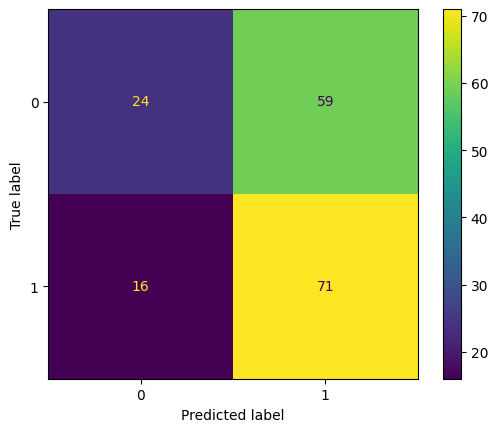

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(models[0],X_valid,Y_valid)
plt.show()